# Finding Best Market to Advertise In

In this project, we'll aim to find the best market to advertise our product in. Our company is e-learning company, which focus are on web and mobile development. 

## import data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



## Understanding Data

In [43]:
df_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [45]:
df_survey.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
df_survey.dtypes

Age                       float64
AttendedBootcamp          float64
BootcampFinish            float64
BootcampLoanYesNo         float64
BootcampName               object
BootcampRecommend         float64
ChildrenNumber            float64
CityPopulation             object
CodeEventConferences      float64
CodeEventDjangoGirls      float64
CodeEventFCC              float64
CodeEventGameJam          float64
CodeEventGirlDev          float64
CodeEventHackathons       float64
CodeEventMeetup           float64
CodeEventNodeSchool       float64
CodeEventNone             float64
CodeEventOther             object
CodeEventRailsBridge      float64
CodeEventRailsGirls       float64
CodeEventStartUpWknd      float64
CodeEventWkdBootcamps     float64
CodeEventWomenCode        float64
CodeEventWorkshops        float64
CommuteTime                object
CountryCitizen             object
CountryLive                object
EmploymentField            object
EmploymentFieldOther       object
EmploymentStat

# Checking for Sample Representativity

Most of our courses are focus on web and mobile development, but we also cover other domains such as data science, game dev, etc. We'd like to know
- Where are the new coders located
- what are the locations with the greatest number of new coders. 
- How much money new coders are willing to spend on learning. 

Before working with the sample data, we'd like to know whether the sample is representative to population or not. 

## Frequency Distribution Interest 

In [47]:
df_survey['JobRoleInterest'].value_counts(normalize=True).sort_values(ascending=False)

Full-Stack Web Developer                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                                      0.020309
  Mobile Developer                                                                                                                                                                          0.016733
Game Developer 

### Insights:
- a lot of people interest in web dev
- a few people interest in mobile dev
- a very few people interest in other field besides mobile dev and web dev

The result shows there are still data that need to be split because many respondent interest in more than one field so we need to split it to get the real result. 

In [48]:
role_interest = df_survey['JobRoleInterest'].dropna()
role_interest_split = role_interest.str.split(',')
role_interest_split

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

In [49]:
n_options = role_interest_split.apply(lambda x: len(x))
print(n_options.median())
print("=================")
print(n_options.value_counts(normalize=True) * 100)

3.0
1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64


### Insights:
It turns out 31% people already decided what field they are interested in and the rest are interest to many subjects. 

In [50]:
web_or_mobile = role_interest.str.contains('Web Developer|Mobile Developer')
web_or_mobile.value_counts(normalize=True)

True     0.862414
False    0.137586
Name: JobRoleInterest, dtype: float64

([<matplotlib.axis.XTick at 0x7f1de30eb978>,
 <a list of 2 Text xticklabel objects>)

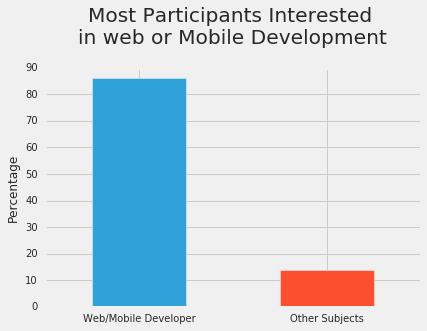

In [51]:
#freq table
freq_table = web_or_mobile.value_counts(normalize=True) * 100
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title("Most Participants Interested \nin web or Mobile Development",y=1.08)
plt.ylabel("Percentage",fontsize=12)
plt.xticks([0,1],['Web/Mobile Developer','Other Subjects'],rotation=0)

### Insights:
86% of respondents are interest in web/mobile developer, this means the data is representative to our goal which is to found these things about people who interest in web/mobile developer:
- Where are the new coders located
- what are the locations with the greatest number of new coders. 
- How much money new coders are willing to spend on learning. 


# Location

In [52]:
# Dropping not respond row and creating frequency
df_notnull = df_survey[df_survey["JobRoleInterest"].notnull()].copy()
abs_country = df_notnull["CountryLive"].value_counts()
rel_country = df_notnull["CountryLive"].value_counts(normalize=True) * 100

In [53]:
freq_country = pd.DataFrame(data={
    'abs_country':abs_country,
    'rel_country':rel_country
})

freq_country

,abs_country,rel_country
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


### Insights
U.S. is the no.1 country we should advertise in because it has the most respondents. But which no.2 country should we pick? India is the second place in frequncy but the difference between the no.3 UK is not so big. We shoud dig more about this.


## ============================================ 

# Spending Money for learn 
Our company sells web dev and mobile dev education with cost of $59, so we need to know what is the respondents budget for learning

In [54]:
df_notnull["MonthsProgramming"] = df_notnull["MonthsProgramming"].replace(0,1)
df_notnull["cost/month"] = df_notnull["MoneyForLearning"] / df_notnull["MonthsProgramming"]

In [55]:
df_notnull["cost/month"].sample(20)

14031    100.000000
17483     50.000000
3858       0.000000
8985       0.000000
7159      16.666667
17099      2.592593
4761      20.000000
6311            NaN
960             NaN
12403      0.000000
5037            NaN
7307       0.000000
14869      0.000000
16704           NaN
3589       5.000000
3087       0.000000
7480       0.000000
16865     16.666667
8677      41.666667
13497      0.000000
Name: cost/month, dtype: float64

#### Insights: There are some NaN values. We should remove it 

In [56]:
df_notnull = df_notnull[df_notnull["cost/month"].notnull()]
df_notnull = df_notnull[df_notnull["CountryLive"].notnull()]
cost_per_country = df_notnull.groupby("CountryLive").mean()

In [57]:
cost_per_country["cost/month"][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: cost/month, dtype: float64

The result shows that Canada coder spent more money on learning the higher density in UK, there might be some outliers

# Dealing with Outlier 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



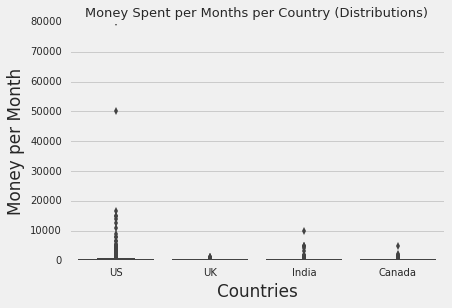

In [62]:
select_country = df_notnull[df_notnull["CountryLive"].str.\
                            contains("United States of America|India|United Kingdom|Canada")].copy()

sns.boxplot("CountryLive","cost/month",data=select_country)
plt.title("Money Spent per Months per Country (Distributions)",fontsize=13)
plt.xlabel("Countries")
plt.ylabel("Money per Month")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

### Insights:
There are some extreme values in US, we should remove it from data.

In [63]:
# removing outliers
df_notnull = df_notnull[df_notnull["cost/month"] < 20000]

In [66]:
cost_per_country = df_notnull.groupby("CountryLive").mean()
cost_per_country["cost/month"][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: cost/month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



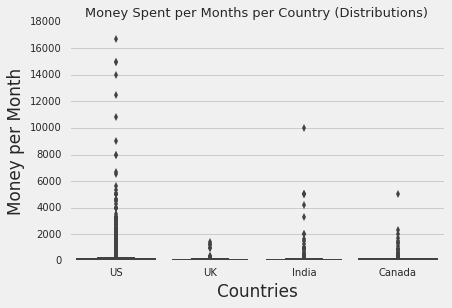

In [67]:
select_country = df_notnull[df_notnull["CountryLive"].str.\
                            contains("United States of America|India|United Kingdom|Canada")].copy()

sns.boxplot("CountryLive","cost/month",data=select_country)
plt.title("Money Spent per Months per Country (Distributions)",fontsize=13)
plt.xlabel("Countries")
plt.ylabel("Money per Month")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

In [72]:
india_data = df_notnull[df_notnull.CountryLive =="India"]
india_outlier = india_data[india_data["cost/month"] >2500].copy()
india_outlier.index


Int64Index([1728, 1755, 7989, 8126, 13398, 15587], dtype='int64')

In [73]:
canada_data = df_notnull[df_notnull.CountryLive =="Canada"]
canada_outlier = canada_data[canada_data["cost/month"] >4000].copy()
canada_outlier.index

Int64Index([13659], dtype='int64')

In [74]:
us_data = df_notnull[df_notnull.CountryLive =="United States of America"]
us_outlier = us_data[us_data["cost/month"] >6000].copy()
us_outlier.index

Int64Index([718, 1222, 3184, 3930, 6805, 7198, 7505, 9778, 16650, 16997,
            17231],
           dtype='int64')

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



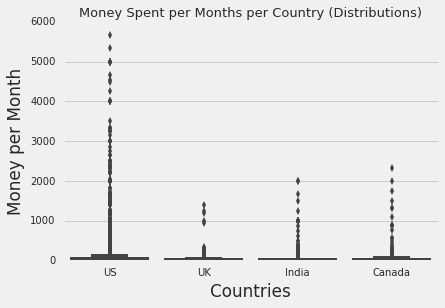

In [75]:
select_country = df_notnull[df_notnull["CountryLive"].str.\
                            contains("United States of America|India|United Kingdom|Canada")].copy()

select_country = select_country.drop(us_outlier.index)
select_country = select_country.drop(canada_outlier.index)
select_country = select_country.drop(india_outlier.index)


sns.boxplot("CountryLive","cost/month",data=select_country)
plt.title("Money Spent per Months per Country (Distributions)",fontsize=13)
plt.xlabel("Countries")
plt.ylabel("Money per Month")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

In [77]:
outliers = us_outlier.index.append(india_outlier.index).append(canada_outlier.index)
outliers

Int64Index([  718,  1222,  3184,  3930,  6805,  7198,  7505,  9778, 16650,
            16997, 17231,  1728,  1755,  7989,  8126, 13398, 15587, 13659],
           dtype='int64')

In [78]:
df_notnull = df_notnull.drop(outliers)
cost_per_country = df_notnull.groupby("CountryLive").mean()
cost_per_country["cost/month"][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: cost/month, dtype: float64

In [83]:
select_country["CountryLive"].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

# Choosing Best Market 
We must remember that we sell our products with price of $59 dollar so we must adjust that variable to our decision. Based on the results, market that definitely we must go to is United States because it has many coders and their spend for learning is above our price which is really good.

Second Country we should go is a little bit difficult to choose, its between India and Canada. We ruled out United Kingdom because their spend for learning is below our products price.

So Canada and India both qualified in terms of their spendin and their density. So, we can choose one of these plans.

# Plan 1:
Use 70% marketing budget for US and the rest for India

# Plan 2: 
Use 70% marketing budget for US and the rest for Canada

# Plan 3:
Use 70% marketing budget for US and the rest split it for Canada and India. We suggest plan 3 because India and Canada both qualified to our market, and we can reach 3 segments market with this